<a href="https://colab.research.google.com/github/samdvies/pyTorchDeepLearnIntro/blob/main/02_ML_LR_sd2323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 [10 marks]

Update the Gradient Descent (GD) code to predict disease progression (DP) based on two different features: body mass index (BMI) and average blood pressure (BP). Follow the same procedure as before to determine the optimal weights for each case.

Execute the modified code to generate the following outcomes:

- Plot illustrating the actual data points and the predicted regression line for disease progression vs BMI according to the final weights obtained.
- Plot illustrating the actual data points and the predicted regression line for disease progression vs average blood pressure (BP) according to the final weights obtained.
- Display the final weights and cost (MSE) obtained after the optimisation process for both cases (keep the values to be used in the same table of tasks 2 and 3).

In [16]:
# Task 1


def predict_dp(X, W):
    return np.dot(X, W)
def cost(X, W, Y):
    prediction = predict_dp(X, W)
    return ((Y - prediction)**2).mean()

# Plotting with new labels
def plot_line(X, W, Y, feature_name):
    """Plot a line from slope and intercept with dynamic labels"""
    y_vals = predict_dp(X, W)

    plt.figure(figsize=(6, 4))
    plt.xlabel(feature_name)
    plt.ylabel('Disease Progression (DP)')

    # Scatter actual data
    plt.scatter(X[:,1], Y, color='red', alpha=0.5, label='Actual')

    # Plot regression line
    plt.plot(X[:,1], y_vals, color='black', linewidth=2, label='Predicted')

    plt.title(f'Regression Analysis: {feature_name}')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def plot_cost(cost_history):
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, len(cost_history) + 1), cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.title('Cost Function over Iterations')
    plt.grid(True)
    plt.show()

def fit(n_iter, X_feature, Y, lr, feature_name):

    W0_hist = []
    W1_hist = []
    costs = []

    X = np.column_stack((np.ones(len(X_feature)), X_feature))

    W = np.zeros(2)

    for i in range(n_iter):
        pred = predict_dp(X, W)


        W[0] += lr * (Y - pred).mean()
        W[1] += lr * ((Y - pred) * X[:, 1]).mean()

        J = cost(X, W, Y)

        W0_hist.append(W[0])
        W1_hist.append(W[1])
        costs.append(J)



    # Final Plot and Output
    print(f"Final Results for {feature_name}:")
    print(f"Iterations: {n_iter}, Final Cost: {J:.6f}")
    print(f"Final Weights: w0 (Bias) = {W[0]:.6f}, w1 (Slope) = {W[1]:.6f}")

    plot_line(X, W, Y, feature_name)
    plot_cost(costs)

    return W, J


Final Results for Body Mass Index (BMI):
Iterations: 20000, Final Cost: 3890.695805
Final Weights: w0 (Bias) = 152.133484, w1 (Slope) = 939.152502


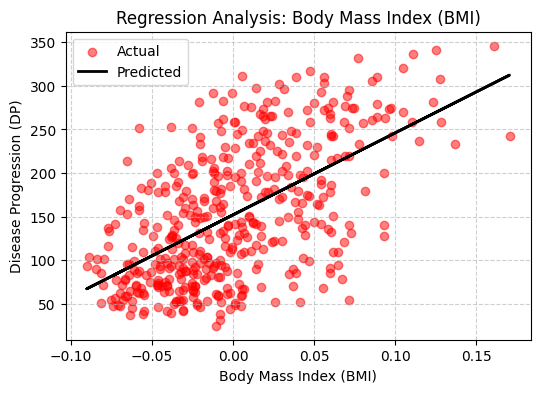

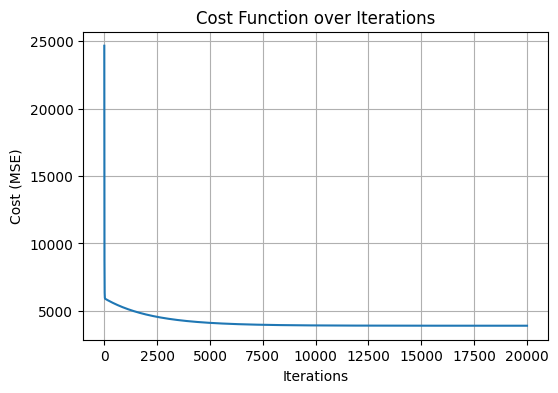

Final Results for Average Blood Pressure (BP):
Iterations: 20000, Final Cost: 4774.249471
Final Weights: w0 (Bias) = 152.133484, w1 (Slope) = 706.997362


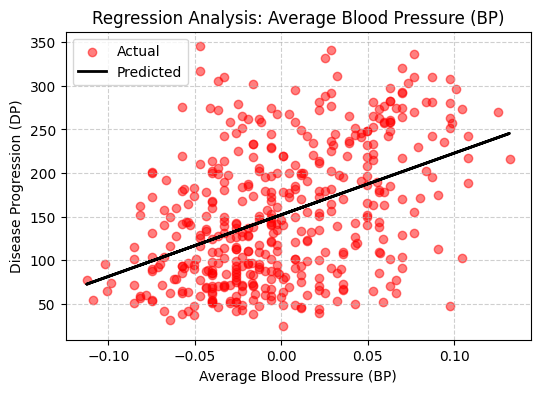

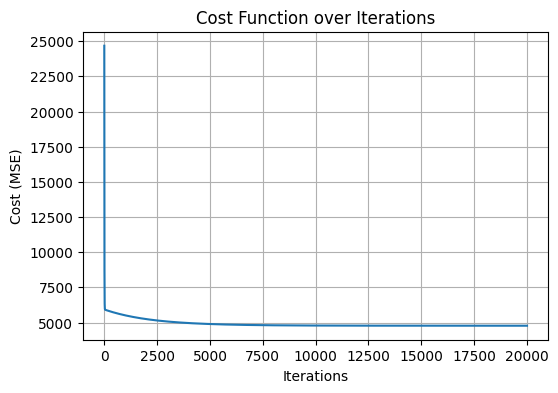

In [17]:
# Task 1 (continued)
# Configuration
lr = 0.1
n_iter = 20000


X_bmi = diabetes_data["bmi"]
Y = diabetes_data["DP"]

weights_bmi, cost_bmi = fit(n_iter, X_bmi, Y, lr, "Body Mass Index (BMI)")

X_bp = diabetes_data["bp"]
# Y is the same target

weights_bp, cost_bp = fit(n_iter, X_bp, Y, lr, "Average Blood Pressure (BP)")


## Task 2 [40 marks]

In this section, we will apply the closed-form solution to address the preceding task while employing the same set of features as previously utilised. The following components are to be included in your notebook:

1. **Implementation of Closed-Form Solution:**
   - Implement a colsed-form solution code to solve the same problem.

2. **Comparative Analysis of Weights and MSE:**
   - Perform a comparison between the final weights and cost (MSE) derived from the Gradient Descent (GD) approach and those acquired through the closed-form solution. Summarise your results in a table (same table for Tasks 2 & 3).

3. **Visualisation of Closed-Form Solution:**
   - Generate a plot that illustrates the line produced by the closed-form solution in relation to the original dataset, as in the GD example.



> **Hint:** To facilitate the process, explore the `numpy.linalg.pinv` function available within the Numpy library. This function offers the capability to compute the (Moore-Penrose) pseudo-inverse of a matrix, which can significantly aid your calculations.



BMI Closed-Form -> Bias: 152.1335, Weight: 949.4353, Cost: 3890.4566


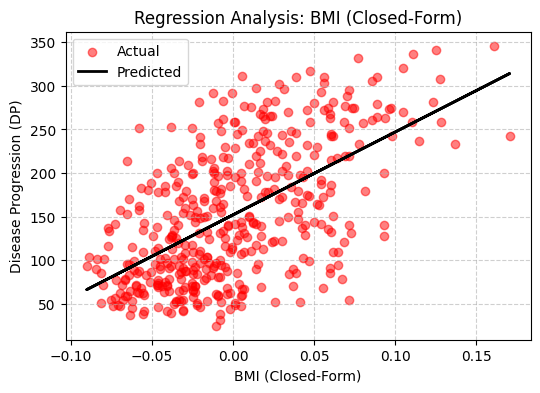

BP Closed-Form -> Bias: 152.1335, Weight: 714.7383, Cost: 4774.1139


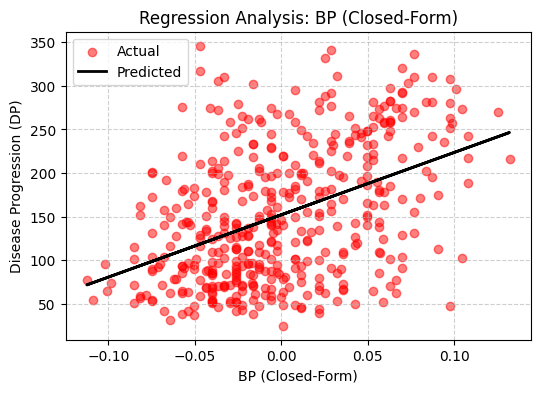

In [23]:
# Task 2


# Reusing the cost and plot functions from the previous step

def fit_closed_form(X_feature, Y):

    # add bias term
    X = np.column_stack((np.ones(len(X_feature)), X_feature))

    # compute the Pseudo-Inverse of X
    W = np.linalg.pinv(X.T @ X) @ X.T @ Y

    return W

#  Execution for BMI
W_bmi_cf = fit_closed_form(diabetes_data["bmi"], diabetes_data["DP"])

# calculate cost (MSE) for these weights
X_bmi_matrix = np.column_stack((np.ones(len(diabetes_data["bmi"])), diabetes_data["bmi"]))
cost_bmi_cf = cost(X_bmi_matrix, W_bmi_cf, diabetes_data["DP"])

print(f"BMI Closed-Form -> Bias: {W_bmi_cf[0]:.4f}, Weight: {W_bmi_cf[1]:.4f}, Cost: {cost_bmi_cf:.4f}")

#Plot
plot_line(X_bmi_matrix, W_bmi_cf, diabetes_data["DP"], "BMI (Closed-Form)")


# BP
W_bp_cf = fit_closed_form(diabetes_data["bp"], diabetes_data["DP"])

X_bp_matrix = np.column_stack((np.ones(len(diabetes_data["bp"])), diabetes_data["bp"]))
cost_bp_cf = cost(X_bp_matrix, W_bp_cf, diabetes_data["DP"])

print(f"BP Closed-Form -> Bias: {W_bp_cf[0]:.4f}, Weight: {W_bp_cf[1]:.4f}, Cost: {cost_bp_cf:.4f}")

# 3. Plot
plot_line(X_bp_matrix, W_bp_cf, diabetes_data["DP"], "BP (Closed-Form)")

In [24]:
# Task 2 (continued)

data = {
    'Feature': ['BMI', 'BMI', 'BP', 'BP'],
    'Method': ['Gradient Descent', 'Closed-Form', 'Gradient Descent', 'Closed-Form'],
    'Intercept (W0)': [weights_bmi[0], W_bmi_cf[0], weights_bp[0], W_bp_cf[0]],
    'Slope (W1)': [weights_bmi[1], W_bmi_cf[1], weights_bp[1], W_bp_cf[1]],
    'Cost (MSE)': [cost_bmi, cost_bmi_cf, cost_bp, cost_bp_cf]
}

df_comparison = pd.DataFrame(data)
print(df_comparison)

  Feature            Method  Intercept (W0)  Slope (W1)   Cost (MSE)
0     BMI  Gradient Descent      152.133484  939.152502  3890.695805
1     BMI       Closed-Form      152.133484  949.435260  3890.456585
2      BP  Gradient Descent      152.133484  706.997362  4774.249471
3      BP       Closed-Form      152.133484  714.738259  4774.113902


## Task 3 [15 marks]

In this section, we will use scikit-learn package to address the preceding task while employing the same set of features as previously utilised. The following components are to be included in your notebook:

1. **Implementation of sckit-learn approach:**
   - Implement a code using sckit-learn to solve the same problems as in tasks 1 & 2.

2. **Comparative Analysis of Weights and MSE:**
   - Perform a comparison between the final weights and MSE derived from the Gradient Descent (GD)  and closed form solution approaches and those acquired through scikit-learn package (include the results in the same table of tasks 1 & 2).

3. **Visualisation of Results:**
   - Generate a plot that illustrates the line produced by scikit-learn package in relation to the original dataset, as in the GD and closed-form examples.

4. **Estimating the Error:**
  - Use the following command from scikit-learn to estimate the MSE error on each case.
  ```python
  from sklearn.metrics import mean_squared_error
  ```

--- Results for BMI (Scikit-Learn) ---
Intercept (W0): 152.133484
Slope (W1): 949.435260
MSE Cost: 3890.456585


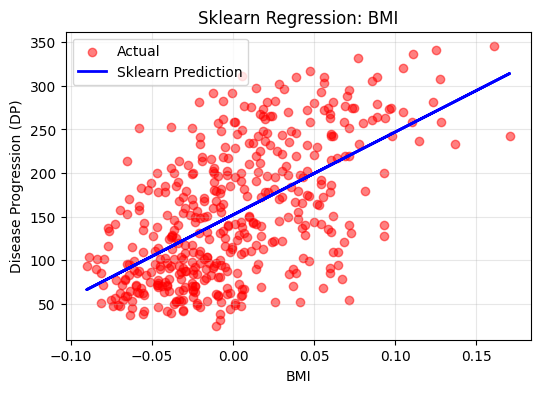

--- Results for BP (Scikit-Learn) ---
Intercept (W0): 152.133484
Slope (W1): 714.738259
MSE Cost: 4774.113902


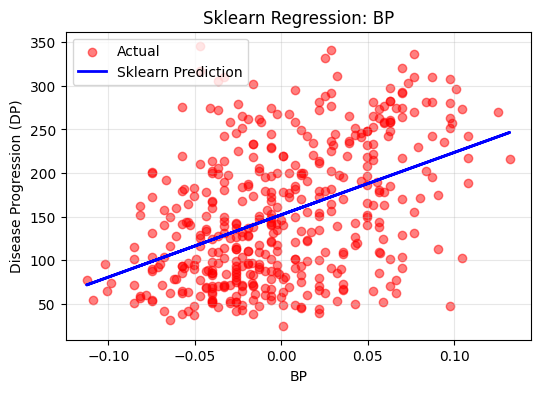

In [18]:
# Task 3
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def fit_sklearn(X_feature, Y, feature_name):
    X_reshaped = X_feature.values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_reshaped, Y)

    predictions = model.predict(X_reshaped)

    mse = mean_squared_error(Y, predictions)

    # Intercept is W0, Coef is W1
    w0 = model.intercept_
    w1 = model.coef_[0]

    print(f"--- Results for {feature_name} (Scikit-Learn) ---")
    print(f"Intercept (W0): {w0:.6f}")
    print(f"Slope (W1): {w1:.6f}")
    print(f"MSE Cost: {mse:.6f}")

    plt.figure(figsize=(6, 4))
    plt.scatter(X_feature, Y, color='red', alpha=0.5, label='Actual')
    plt.plot(X_feature, predictions, color='blue', linewidth=2, label='Sklearn Prediction')
    plt.xlabel(feature_name)
    plt.ylabel('Disease Progression (DP)')
    plt.title(f'Sklearn Regression: {feature_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return w0, w1, mse

#BMI
w0_bmi_sk, w1_bmi_sk, mse_bmi_sk = fit_sklearn(diabetes_data["bmi"], diabetes_data["DP"], "BMI")

# BP
w0_bp_sk, w1_bp_sk, mse_bp_sk = fit_sklearn(diabetes_data["bp"], diabetes_data["DP"], "BP")


In [19]:
# Task 3 (continued)
# Consolidating all results into a Data Frame

comparison_data = {
    'Feature': ['BMI', 'BMI', 'BMI', 'BP', 'BP', 'BP'],
    'Method': [
        'Gradient Descent', 'Closed-Form', 'Scikit-Learn',
        'Gradient Descent', 'Closed-Form', 'Scikit-Learn'
    ],
    'Intercept (W0)': [
        weights_bmi[0], W_bmi_cf[0], w0_bmi_sk,  # BMI values
        weights_bp[0], W_bp_cf[0], w0_bp_sk      # BP values
    ],
    'Slope (W1)': [
        weights_bmi[1], W_bmi_cf[1], w1_bmi_sk,
        weights_bp[1], W_bp_cf[1], w1_bp_sk
    ],
    'Cost (MSE)': [
        cost_bmi, cost_bmi_cf, mse_bmi_sk,
        cost_bp, cost_bp_cf, mse_bp_sk
    ]
}

df_final = pd.DataFrame(comparison_data)

# Display the table
display(df_final)

,Feature,Method,Intercept (W0),Slope (W1),Cost (MSE)
0,BMI,Gradient Descent,152.133484,939.152502,3890.695805
1,BMI,Closed-Form,152.133484,949.435260,3890.456585
2,BMI,Scikit-Learn,152.133484,949.435260,3890.456585
3,BP,Gradient Descent,152.133484,706.997362,4774.249471
4,BP,Closed-Form,152.133484,714.738259,4774.113902
5,BP,Scikit-Learn,152.133484,714.738259,4774.113902


## Task 4 [10 marks]

Write a code that use all the 10 features in the data as inputs to the regressor in order to predict the disease pregression (DP). Then, rank the features by their importance (using their absolute weight values). Finally, craete a plot that shows how the mean squared error (MSE) changes as you progressively add features, starting from the most important ones.

From the resulting plot, identify the approximate number of features you would choose to keep (i.e. the point where adding more features no longer significantly reduces the MSE (the 'elbow point')). Treat this as a visual, judgment-based choice, and include a brief justification in your write-up referring to what you observe in the plot.





> You are allowed to import the following in this task:
```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
```



--- Feature Importance Ranking ---
  Feature      Weight  Abs_Weight
0      s1 -792.175639  792.175639
1      s5  751.273700  751.273700
2     bmi  519.845920  519.845920
3      s2  476.739021  476.739021
4      bp  324.384646  324.384646
5     sex -239.815644  239.815644
6      s4  177.063238  177.063238
7      s3  101.043268  101.043268
8      s6   67.626692   67.626692
9     age  -10.009866   10.009866


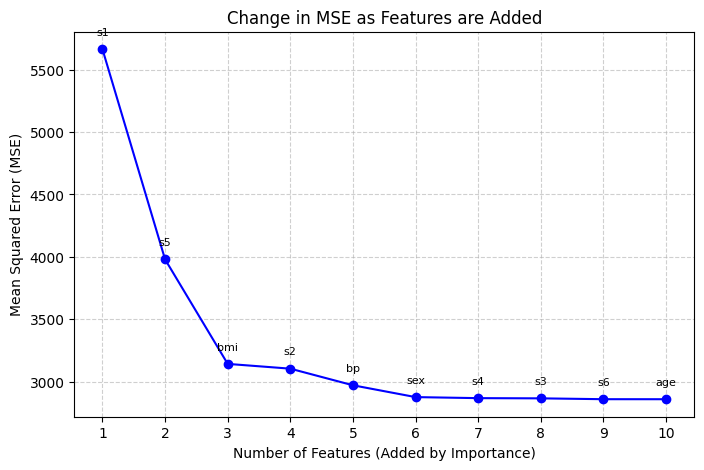


--- MSE Reduction History ---
Top 1 Feature(s): MSE = 5663.32
Top 2 Feature(s): MSE = 3979.71
Top 3 Feature(s): MSE = 3142.69
Top 4 Feature(s): MSE = 3104.44
Top 5 Feature(s): MSE = 2971.38
Top 6 Feature(s): MSE = 2876.68
Top 7 Feature(s): MSE = 2868.34
Top 8 Feature(s): MSE = 2866.67
Top 9 Feature(s): MSE = 2859.88
Top 10 Feature(s): MSE = 2859.70


In [20]:
# Task 4

feature_cols = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X_all = diabetes_data[feature_cols]
Y = diabetes_data['DP']

full_model = LinearRegression()
full_model.fit(X_all, Y)

importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Weight': full_model.coef_,
    'Abs_Weight': np.abs(full_model.coef_)
})

# Sort by Absolute Weight (High to Low)
ranked_features = importance_df.sort_values(by='Abs_Weight', ascending=False).reset_index(drop=True)

print("--- Feature Importance Ranking ---")
print(ranked_features[['Feature', 'Weight', 'Abs_Weight']])

mse_history = []
features_so_far = []

# Loop through the ranked features list
for feature in ranked_features['Feature']:
    features_so_far.append(feature)

    X_subset = diabetes_data[features_so_far]

    # Train a new model on this subset
    model_temp = LinearRegression()
    model_temp.fit(X_subset, Y)


    predictions = model_temp.predict(X_subset)
    mse = mean_squared_error(Y, predictions)
    mse_history.append(mse)

# 5. Plotting MSE vs Number of Features
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), mse_history, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Features (Added by Importance)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Change in MSE as Features are Added')
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate the specific features on the x-axis for clarity
for i, txt in enumerate(ranked_features['Feature']):
    plt.annotate(txt, (i+1, mse_history[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.show()

# Output the MSE history for inspection
print("\n--- MSE Reduction History ---")
for i, mse in enumerate(mse_history):
    print(f"Top {i+1} Feature(s): MSE = {mse:.2f}")


I would choose to keep the first 6 features. This is because the addition of all these causes a noticeable drop in error. The introduction of the next 4 features cause negligible change so we need not consider them.

## Task 5 [25 marks]

In this task, you will implement k-Fold Cross-Validation on the Diabetes dataset using scikit-learn.

Your task is to write a code that performs the following steps:

1. Load the Diabetes dataset.
2. Define the number of folds for cross-validation.
3. Calculate the number of samples per fold.
4. Perform k-Fold Cross-Validation:
   - For each fold:
     - Split the data into training and test sets.
     - Train a Linear Regression model on the training set.
     - Make predictions on the test set.
     - Calculate the Mean Squared Error (MSE) for the predictions.
     - Print the MSE for each fold.
     - Store the MSE values in a list.
5. Calculate the average MSE across all folds and print it.

> In this task you are allowed to use scikit-learn library to fit the linear regression model and for calculating the MSE. However, you are expected to create your own code (using numpy) for k-fold validation set. Below are the corresponding commands that you can import:
- `from sklearn.linear_model import LinearRegression`
- `from sklearn.metrics import mean_squared_error`

In [22]:

#Define K and Shuffle Data
k = 10
n_samples = len(X)

# Create a list of random indices
indices = np.arange(n_samples)
np.random.seed(42)
np.random.shuffle(indices)

#  Calculate fold size
fold_size = n_samples // k
print(f"Total Samples: {n_samples}")
print(f"Fold Size: ~{fold_size} samples")
print("-" * 30)

mse_list = []

# Perform k-Fold Cross-Validation
for i in range(k):
    # Determine the start and end index for the current validation fold
    start = i * fold_size
    end = (i + 1) * fold_size

    test_idx = indices[start:end]

    # Identify ndices for training
    train_idx = np.concatenate((indices[:start], indices[end:]))

    # Split the data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    # Train the Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make Predictions
    predictions = model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, predictions)
    mse_list.append(mse)

    print(f"Fold {i+1}: MSE = {mse:.4f}")

# 5. Calculate Average MSE
avg_mse = np.mean(mse_list)
print("-" * 30)
print(f"Average MSE across {k} folds: {avg_mse:.4f}")



Total Samples: 442
Fold Size: ~44 samples
------------------------------
Fold 1: MSE = 2668.9346
Fold 2: MSE = 3158.0861
Fold 3: MSE = 2458.2403
Fold 4: MSE = 2902.6955
Fold 5: MSE = 3547.4570
Fold 6: MSE = 3028.3293
Fold 7: MSE = 2235.7355
Fold 8: MSE = 3095.2028
Fold 9: MSE = 3761.2054
Fold 10: MSE = 2893.8280
------------------------------
Average MSE across 10 folds: 2974.9714
